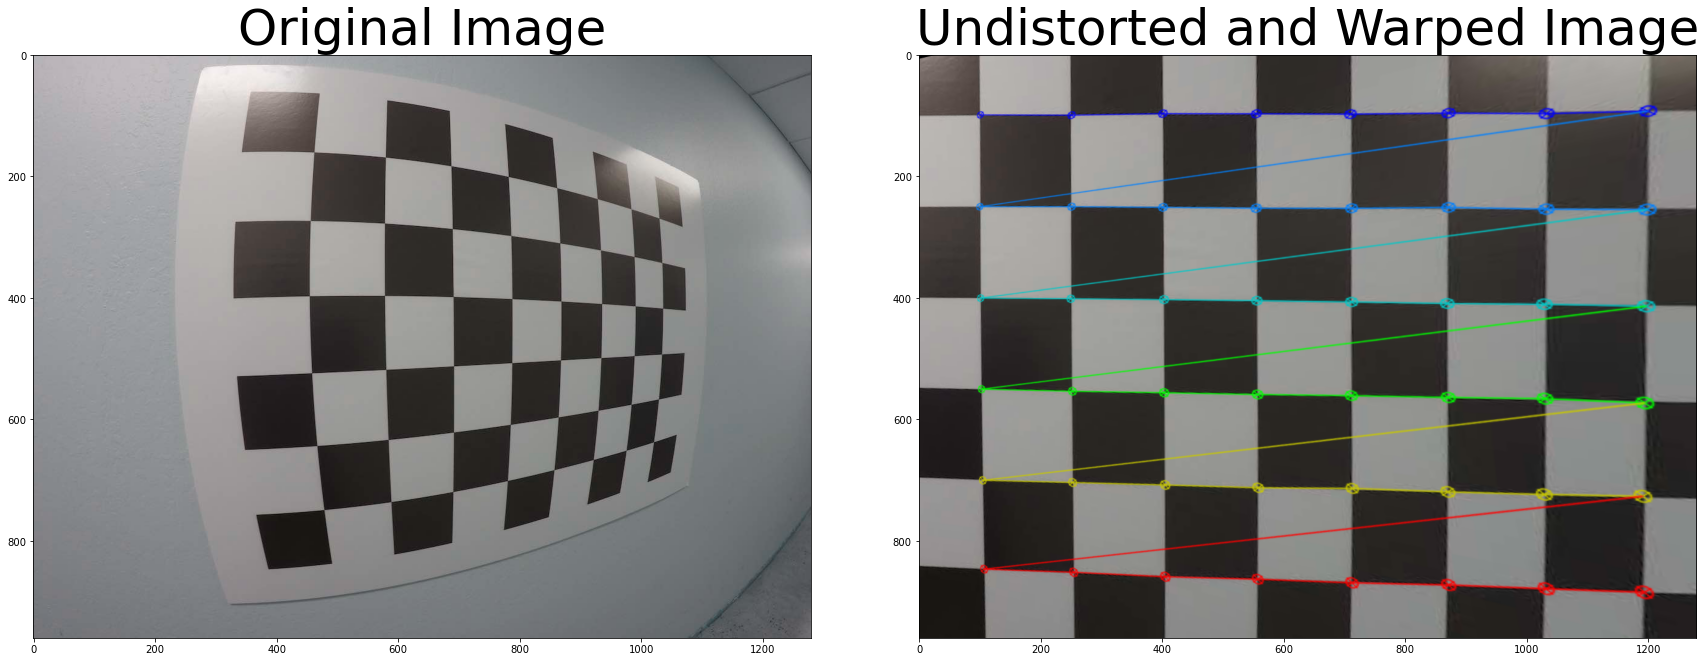

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    img_size = (img.shape[1], img.shape[0])
    # 1) Undistort using mtx and dist

    dst = cv2.undistort(img, mtx, dist, None, mtx)

    # 2) Convert to grayscale

    gray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)

    # 3) Find the chessboard corners

    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)


    # 4) If corners found: 
            # a) draw corners
    img_corner = cv2.drawChessboardCorners(dst, (8,6), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])

    corners = [x[0] for x in corners]
    src = np.float32([[corners[0], corners[1], corners[8], corners[9]]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
    dest = np.float32([[100, 100], [250, 100], [100, 250], [250,250]])


            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dest)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(dst, M, img_size, flags=cv2.INTER_LINEAR)
    #delete the next two lines
    # M = None
    # warped = np.copy(dst) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
